In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#df = pd.read_csv('Data/Processed_data.csv', index_col=[0])
df = pd.read_csv('Data/MICE_data.csv', index_col=[0])

/rds/general/user/cam119/home/anaconda3/envs/ML_project/lib/python3.6/site-packages/numpy/lib/arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [3]:
df.shape

(3801534, 41)

In [4]:
df.head()

,birth_attendant,birth_place,bmi,cigs_before_preg,birthweight_g,last_norm_menses_mn,last_norm_menses_yr,birth_mn,birth_time,birth_dy,...,prior_births_dead,prior_births_living,prior_terminations,prepreg_weight,delivery_method,res_status,prev_cesarean,num_prev_cesareans,infant_sex,weight_gain
0,1.0,1.0,30.7,0.0,3657.0,4.000000,2017.000000,1.0,1227.0,2.0,...,0.0,1.0,2.0,190.0,1.0,2.0,0.0,0.0,1.0,41.0
1,1.0,1.0,33.3,2.0,3242.0,6.811794,2016.777958,1.0,1704.0,2.0,...,0.0,2.0,0.0,188.0,4.0,2.0,1.0,2.0,0.0,0.0
2,1.0,1.0,30.0,0.0,3470.0,4.000000,2017.000000,1.0,336.0,2.0,...,0.0,1.0,0.0,215.0,1.0,1.0,0.0,0.0,1.0,58.0
3,3.0,1.0,23.7,0.0,3140.0,5.000000,2017.000000,1.0,938.0,2.0,...,0.0,2.0,0.0,138.0,1.0,2.0,0.0,0.0,0.0,0.0
4,1.0,1.0,35.5,0.0,2125.0,6.822145,2016.826229,1.0,830.0,3.0,...,0.0,1.0,4.0,220.0,3.0,1.0,0.0,0.0,1.0,0.0


In [28]:
df.describe()

,birth_attendant,birth_place,bmi,cigs_before_preg,birthweight_g,last_norm_menses_mn,last_norm_menses_yr,birth_mn,birth_time,birth_dy,...,prior_births_dead,prior_births_living,prior_terminations,prepreg_weight,delivery_method,res_status,prev_cesarean,num_prev_cesareans,infant_sex,weight_gain
count,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,...,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,1.319167,1.03660,27.204950,1.158515,3269.019247,6.566869,2017.251006,6.560500,1218.21940,4.031700,...,0.020361,1.133737,0.426186,159.395945,1.795077,1.332900,0.153408,0.218400,0.515800,29.660009
std,0.741019,0.33507,6.784139,5.019205,588.141986,3.405101,0.425418,3.411672,626.39526,1.839031,...,0.242678,1.279816,0.892259,42.030621,1.159554,0.531701,0.360272,0.586669,0.499775,14.890833
min,1.000000,1.00000,15.000000,0.000000,277.000000,1.000000,2016.000000,1.000000,0.00000,1.000000,...,0.000000,0.000000,0.000000,79.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.00000,22.300000,0.000000,2977.000000,4.000000,2017.000000,4.000000,758.00000,2.000000,...,0.000000,0.000000,0.000000,130.000000,1.000000,1.000000,0.000000,0.000000,0.000000,20.000000
50%,1.000000,1.00000,25.700000,0.000000,3310.000000,6.576958,2017.000000,7.000000,1230.00000,4.000000,...,0.000000,1.000000,0.000000,150.000000,1.000000,1.000000,0.000000,0.000000,1.000000,29.600494
75%,1.000000,1.00000,30.700000,0.000000,3630.000000,9.000000,2017.260500,10.000000,1723.00000,6.000000,...,0.000000,2.000000,1.000000,180.000000,3.000000,2.000000,0.000000,0.000000,1.000000,38.000000
max,5.000000,7.00000,66.400000,98.000000,6150.000000,12.000000,2018.000000,12.000000,2359.00000,7.000000,...,10.000000,17.000000,14.000000,375.000000,6.000000,4.000000,1.000000,6.000000,1.000000,98.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3801534 entries, 0 to 3801533
Data columns (total 41 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   birth_attendant        float64
 1   birth_place            float64
 2   bmi                    float64
 3   cigs_before_preg       float64
 4   birthweight_g          float64
 5   last_norm_menses_mn    float64
 6   last_norm_menses_yr    float64
 7   birth_mn               float64
 8   birth_time             float64
 9   birth_dy               float64
 10  m_deliveryweight       float64
 11  f_age                  float64
 12  f_education            float64
 13  f_hispanic             float64
 14  f_race6                float64
 15  gonorrhea              float64
 16  labour_induced         float64
 17  m_age                  float64
 18  m_nativity             float64
 19  m_education            float64
 20  m_hispanic             float64
 21  admit_icu              float64
 22  m_race6           

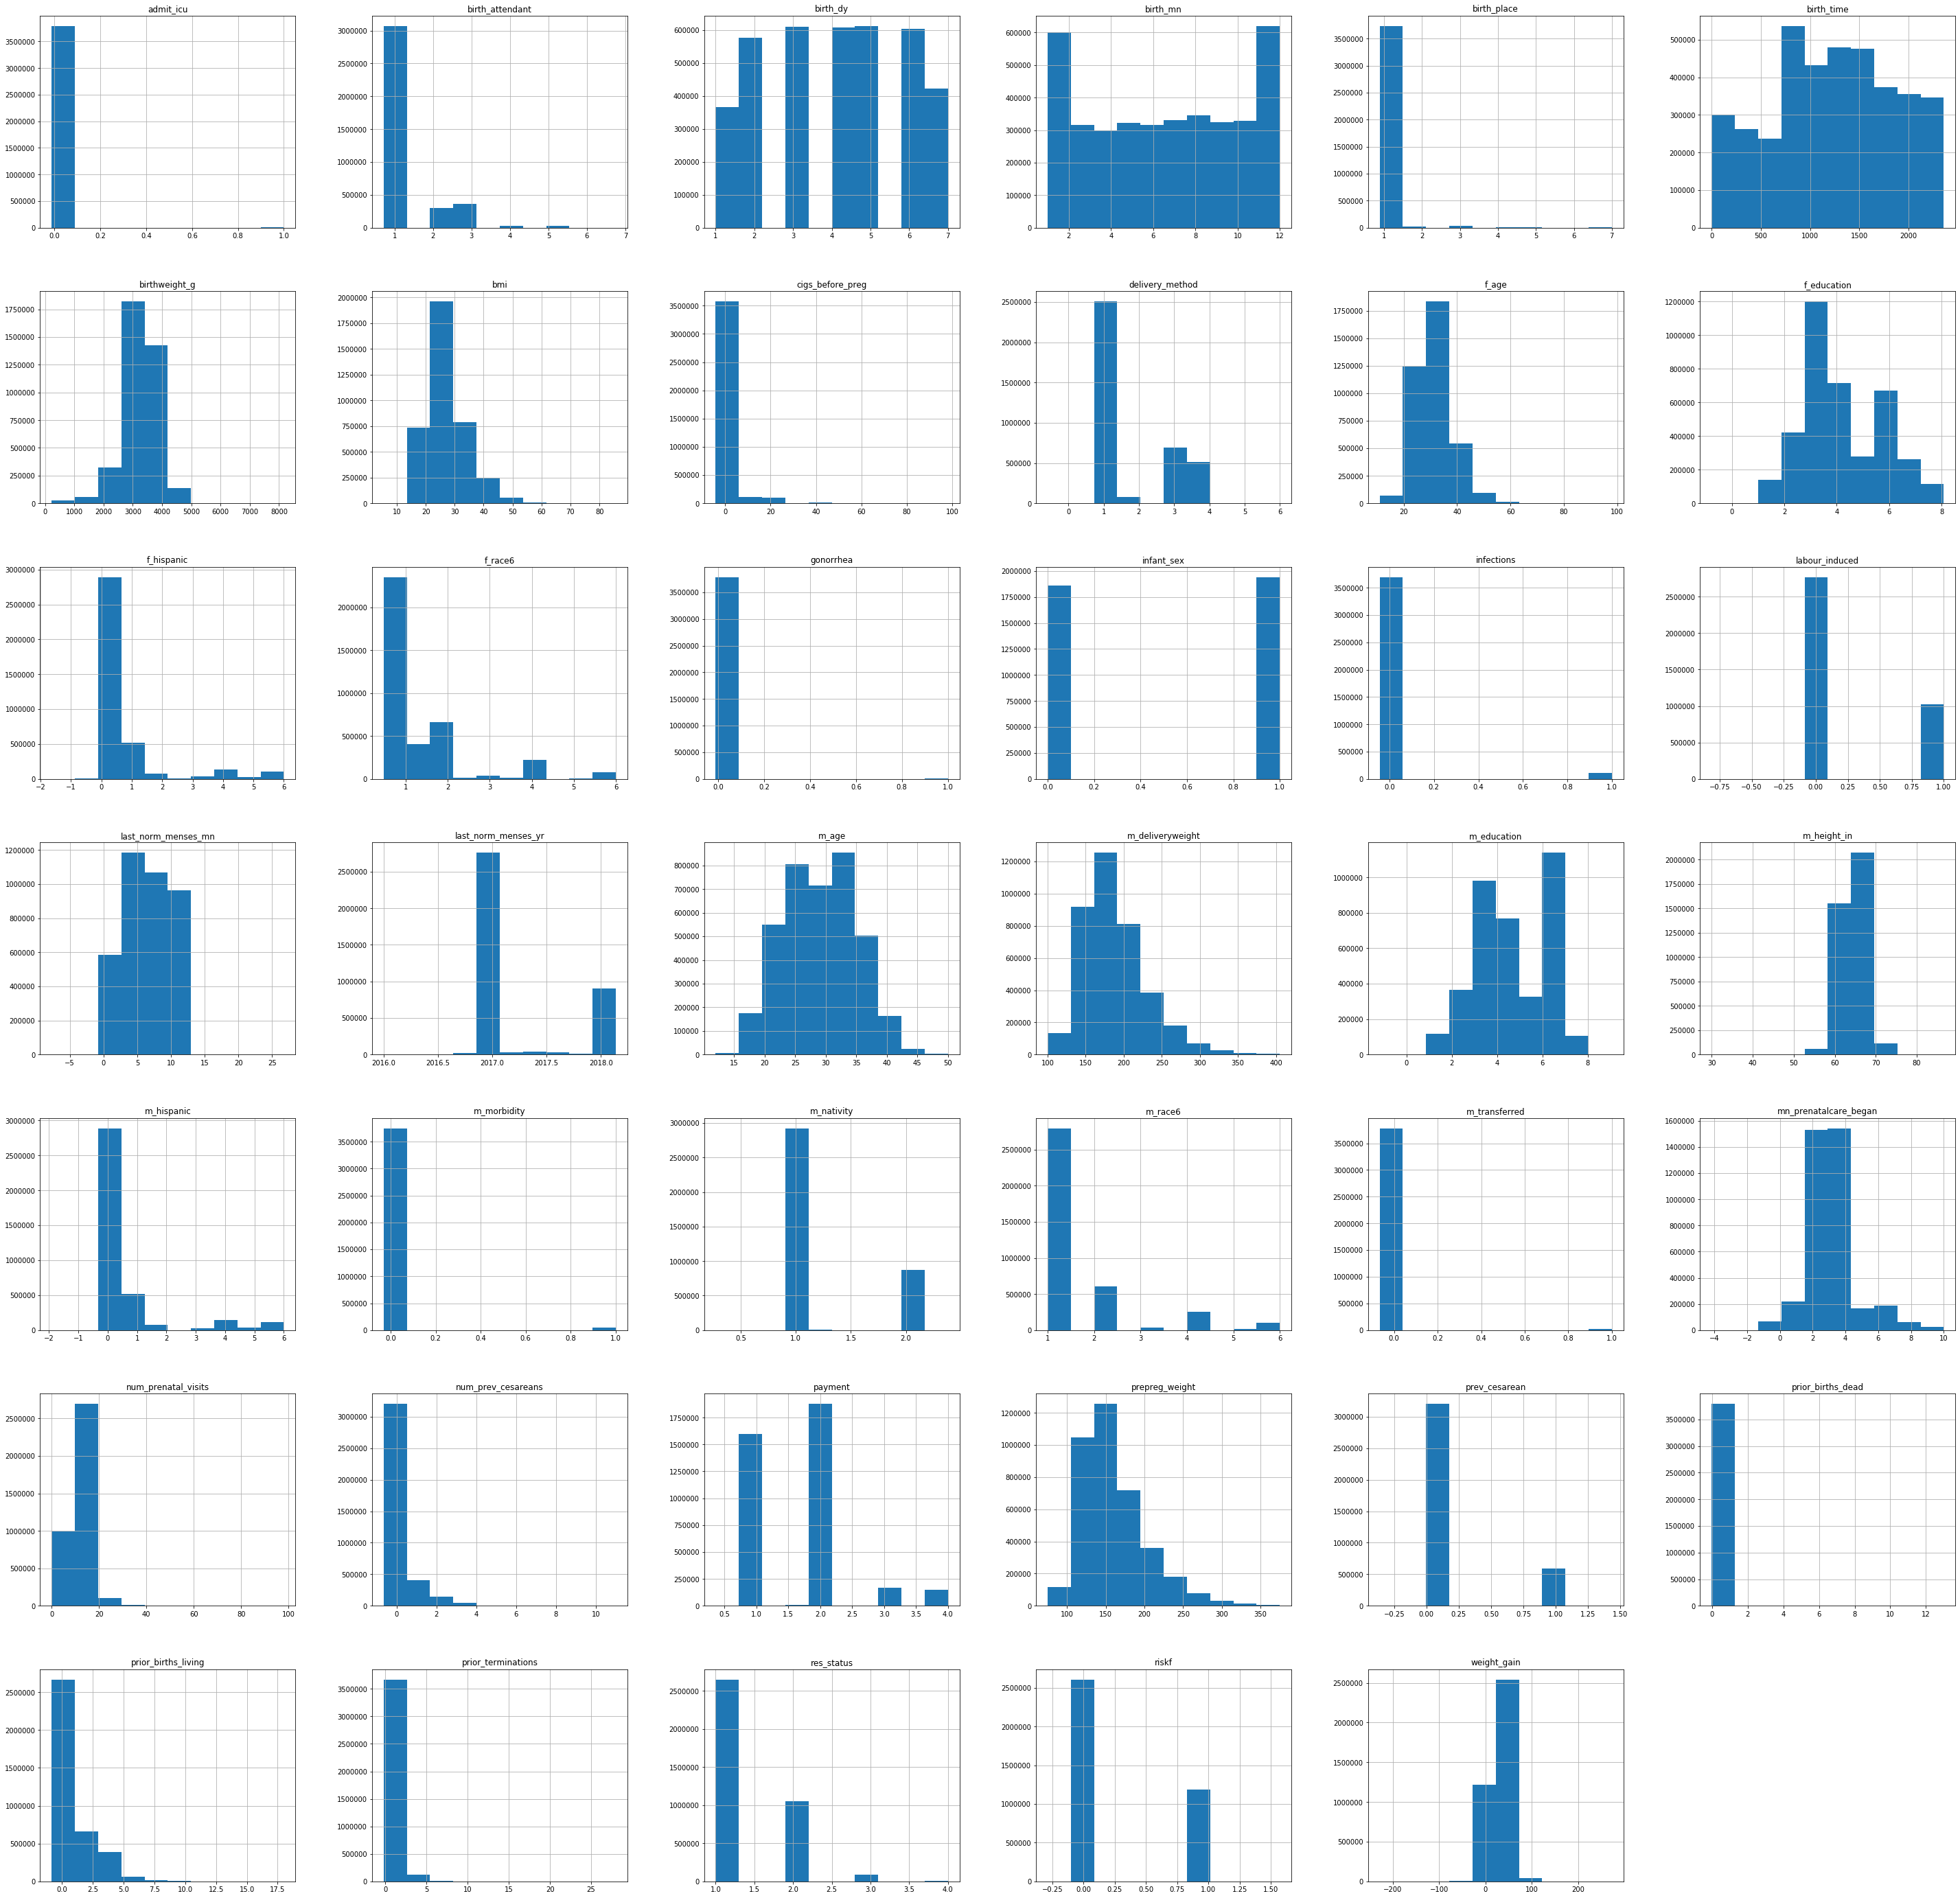

In [6]:
df.hist(figsize = (50,50))
plt.show()

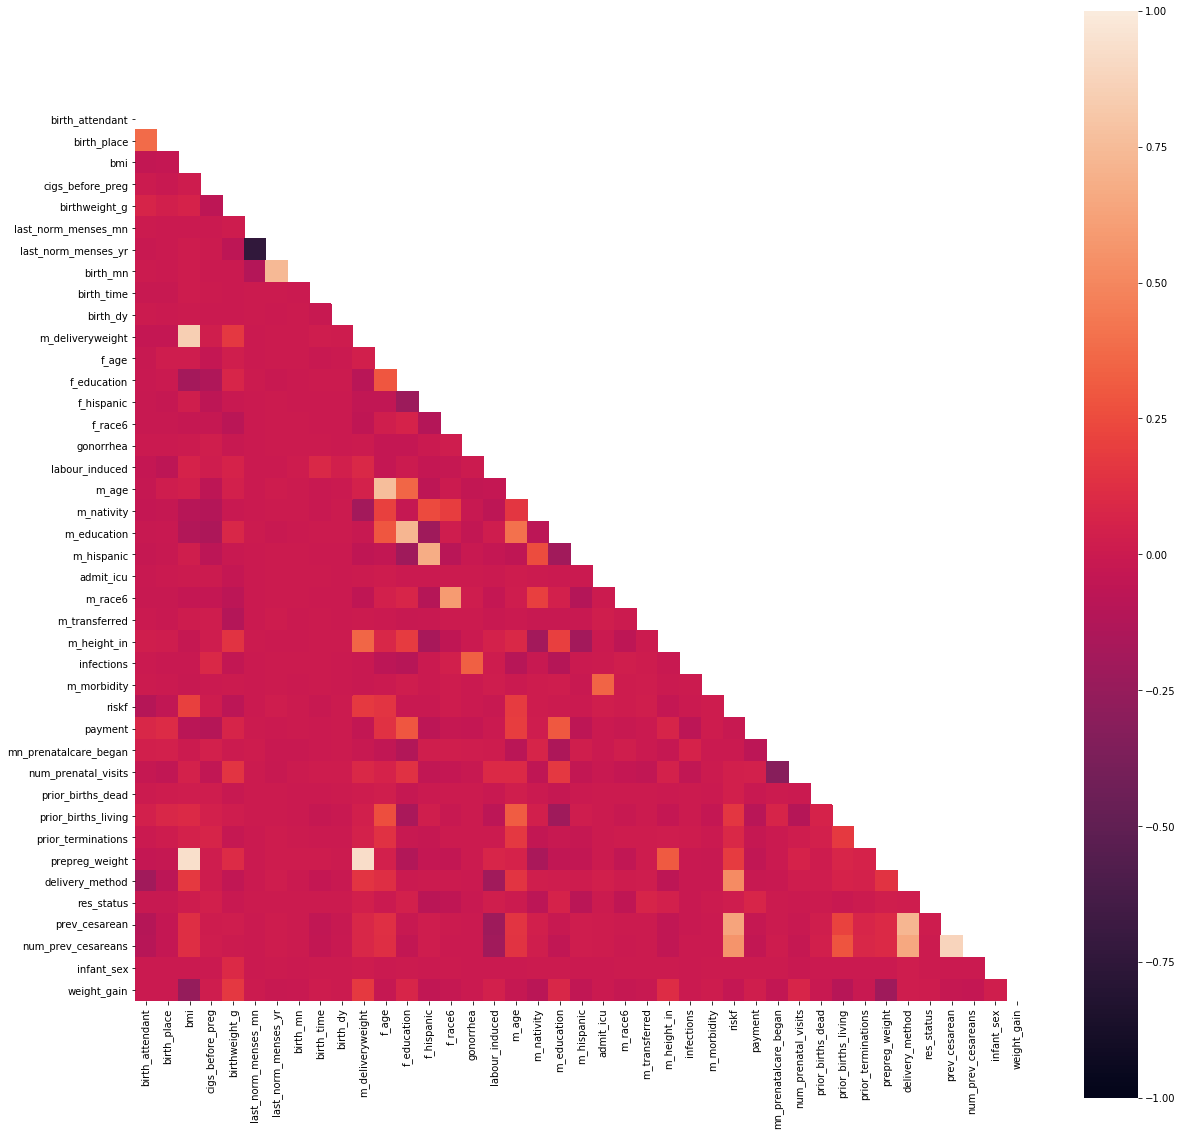

In [7]:
corr_matrix = df.corr()
mask = np.triu(np.ones_like(corr_matrix, dtype=np.bool))

plt.figure(figsize=(20,20))
sns.heatmap(corr_matrix, mask=mask, square=True, vmin=-1, vmax=1)
plt.show()

In [8]:
df['weight_change'] = df['m_deliveryweight'] - df['prepreg_weight']

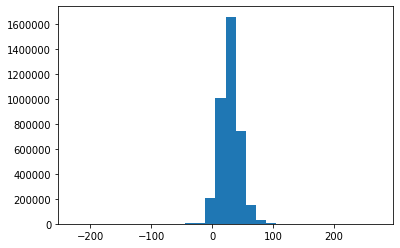

In [11]:
plt.hist(df['weight_gain'], bins=30);

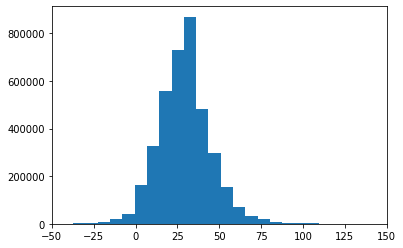

In [10]:
plt.hist(df['weight_change'], bins=70)
plt.xlim(-50, 150);

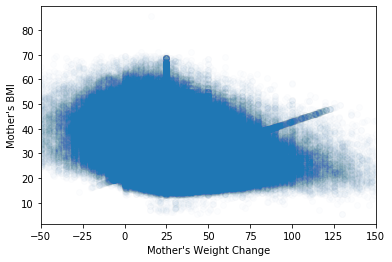

In [14]:
plt.scatter(df['weight_change'], df['bmi'], alpha=0.01)
plt.xlabel('Mother\'s Weight Change')
plt.ylabel('Mother\'s BMI')
plt.xlim(-50, 150)
plt.show()

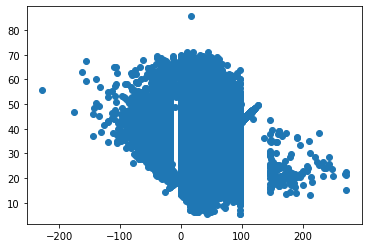

In [15]:
plt.scatter(df['weight_gain'], df['bmi']);

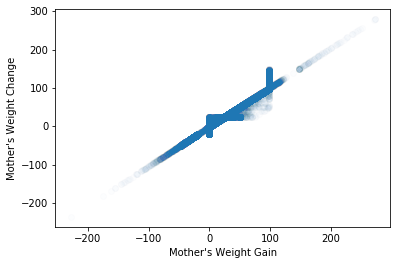

In [16]:
plt.scatter(df['weight_gain'], df['weight_change'], alpha=0.01)
plt.xlabel('Mother\'s Weight Gain')
plt.ylabel('Mother\'s Weight Change')
plt.show()

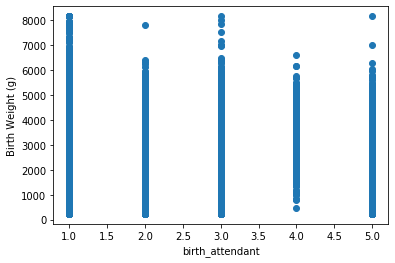

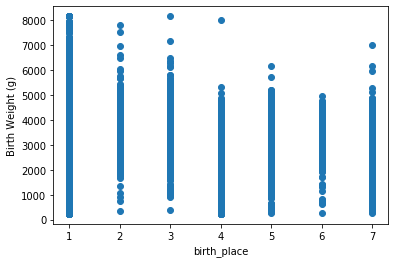

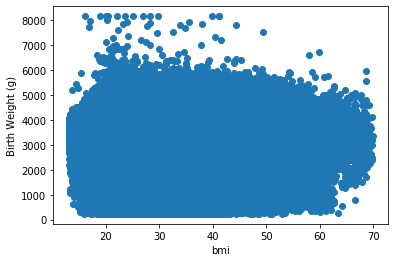

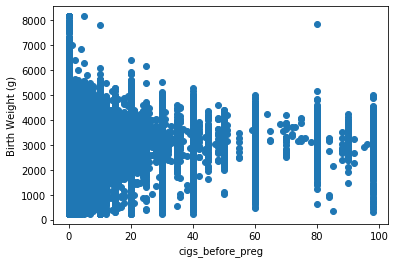

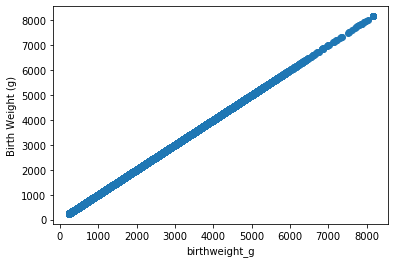

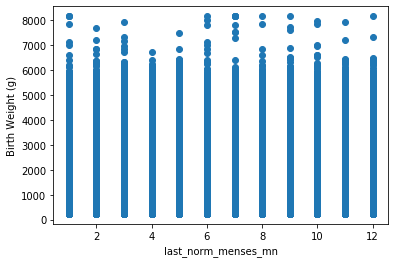

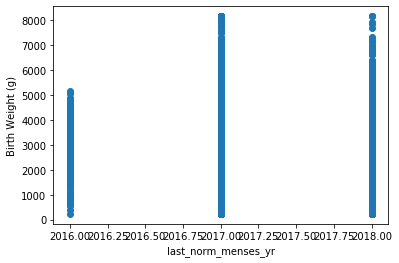

ValueError: could not convert string to float: 

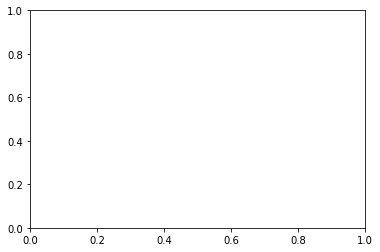

In [63]:
columns = list(df.columns)

for i in columns:
    plt.scatter(df[i], df['birthweight_g'], alpha=0.01)
    plt.xlabel(i)
    plt.ylabel("Birth Weight (g)")
    plt.show()

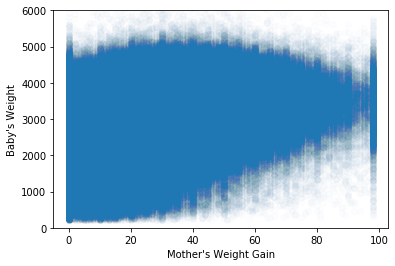

In [64]:
plt.scatter(df['weight_gain'], df['birthweight_g'], alpha=0.01)
plt.xlabel('Mother\'s Weight Gain')
plt.ylabel('Baby\'s Weight')
plt.ylim(0, 6000)
plt.show()

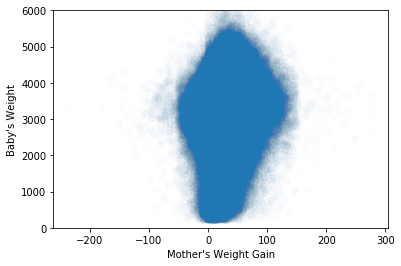

In [17]:
plt.scatter(df['weight_change'], df['birthweight_g'], alpha=0.01)
plt.xlabel('Mother\'s Weight Gain')
plt.ylabel('Baby\'s Weight')
plt.ylim(0, 6000)
plt.show()

#### Looking at birthweight

In [65]:
print('{:.2f}% of infants born in US in 2018 were LBW infants'.\
      format(1e2*len(df[df['birthweight_g'] < 2500])/len(df)))

8.27% of infants born in US in 2018 were LBW infants


C:\Users\catri\Anaconda\lib\site-packages\numpy\lib\histograms.py:829: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\catri\Anaconda\lib\site-packages\numpy\lib\histograms.py:830: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


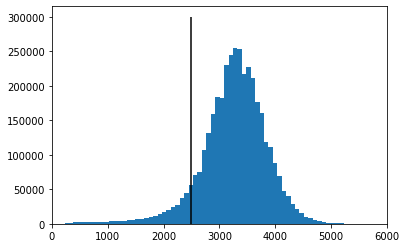

In [66]:
plt.hist(df['birthweight_g'], bins=10**2)
plt.xlim(0, 6*10**3)
plt.vlines(2500, 0, 3*10**5)
plt.show()

#### Visualisation of PCA

In [17]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [18]:
X = df.drop(['birthweight_g'], axis=1)
y = df['birthweight_g']

In [19]:
scaler = StandardScaler()
scaler.fit(X)

X_scaled = scaler.transform(X)

In [20]:
pca = PCA(n_components=5)
pca.fit(X_scaled)

x_new = pca.transform(X_scaled)

In [21]:
x_new.shape

(10000, 5)

* Biplot

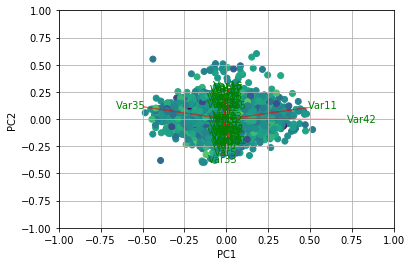

In [22]:
def myplot(score,coeff,labels=None):
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    plt.scatter(xs * scalex,ys * scaley, c = y)
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'r',alpha = 0.5)
        if labels is None:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = 'g', ha = 'center', va = 'center')
        else:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color = 'g', ha = 'center', va = 'center')
    plt.xlim(-1,1)
    plt.ylim(-1,1)
    plt.xlabel("PC{}".format(1))
    plt.ylabel("PC{}".format(2))
    plt.grid()

#Call the function. Use only the 2 PCs.
myplot(x_new[:,0:2],np.transpose(pca.components_[0:2, :]))
plt.show()

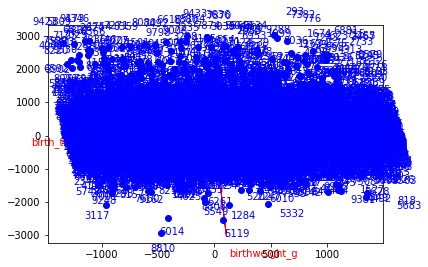

In [23]:
dat = df.copy()
# if no row or column titles in your csv, pass 'header=None' into read_csv
# and delete 'index_col=0' -- but your biplot will be clearer with row/col names



## perform PCA

n = len(dat.columns)

pca = PCA(n_components = n)
# defaults number of PCs to number of columns in imported data (ie number of
# features), but can be set to any integer less than or equal to that value

pca.fit(dat)



## project data into PC space

# 0,1 denote PC1 and PC2; change values for other PCs
xvector = pca.components_[0] # see 'prcomp(my_data)$rotation' in R
yvector = pca.components_[1]

xs = pca.transform(dat)[:,0] # see 'prcomp(my_data)$x' in R
ys = pca.transform(dat)[:,1]




## visualize projections
    
## Note: scale values for arrows and text are a bit inelegant as of now,
##       so feel free to play around with them

for i in range(len(xvector)):
# arrows project features (ie columns from csv) as vectors onto PC axes
    plt.arrow(0, 0, xvector[i]*max(xs), yvector[i]*max(ys),
              color='r', width=0.0005, head_width=0.0025)
    plt.text(xvector[i]*max(xs)*1.2, yvector[i]*max(ys)*1.2,
             list(dat.columns.values)[i], color='r')

for i in range(len(xs)):
# circles project documents (ie rows from csv) as points onto PC axes
    plt.plot(xs[i], ys[i], 'bo')
    plt.text(xs[i]*1.2, ys[i]*1.2, list(dat.index)[i], color='b')

plt.show()